In [15]:
#from astropy import units
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from numpy import sum
import seaborn as sns
#import corner
from scipy.optimize import curve_fit
from scipy.interpolate import RegularGridInterpolator 
from scipy.interpolate import RectBivariateSpline
#from matplotlib.mlab import griddata
from scipy.interpolate import griddata
from scipy import interpolate
%matplotlib inline

In [16]:
Teff, logg, M, Age = np.loadtxt("Bergeron_WDgrid.txt", unpack=True)

In [17]:
tlist = Teff[0:60]
glist = logg[0::60]

In [18]:
tableM = np.zeros([len(glist), len(tlist)])
tableage = np.zeros([len(glist), len(tlist)])

In [19]:
for i in range(0, len(glist)):
	for j in range(0, len(tlist)):
		tableM[i][j] = M[i*(len(tlist))+j]
		tableage[i][j] = Age[i*(len(tlist))+j]

interpMo = RegularGridInterpolator((glist,tlist), tableM, bounds_error=False, fill_value=None)
interpage = RegularGridInterpolator((glist,tlist), tableage, bounds_error=False, fill_value=None)

In [20]:
modg = 7.781 - 0.09
modT = 16818 + 297.

In [22]:
mass = interpMo([modg,modT])
#print mass

In [23]:
modage = interpage([modg,modT])
#print modage / 10.0**6.

In [24]:
t_He, logg_He, M_He, Ro_He, age_He = np.loadtxt('../Natalie/mygrid.txt', unpack=True)

In [25]:
modg_He = 7.62 + 0.05
T_He = 15900. + 290
modT_He = np.log10(T_He)

In [26]:
modage_He = griddata((t_He, logg_He), age_He, (modT_He, modg_He), method='linear', fill_value=1e20)
modmass_He = griddata((t_He, logg_He), M_He, (modT_He, modg_He), method='linear', fill_value=1e20)
#print modage_He
#print modmass_He

In [27]:
#g1, t1, g2, t2, dist = np.loadtxt('posterior_wd2.txt', unpack=True)
g1, t1, g2, t2 = np.loadtxt('posterior_setdist_plummer.txt', unpack=True)

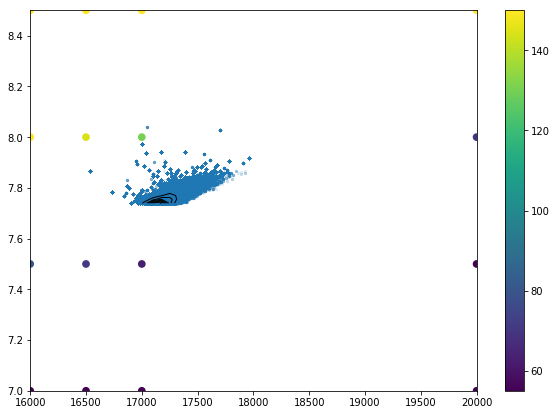

In [28]:
gridage = Age / 10.0**6.
fig, ax = plt.subplots(figsize=(10,7))
ax.set_ylim([7.0,8.5])
ax.set_xlim([16000,20000])

from matplotlib.colors import LogNorm
counts, xbins, ybins = np.histogram2d(t2, g2, bins=20, normed=LogNorm())

plt.contour(xbins[:-1],ybins[:-1],counts.transpose(),
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    linewidths=1,colors='black',linestyles='solid');
#ax.scatter(t2, g2, c=modage_He_in, s=5, edgecolor='none', cmap="winter", vmin=0, vmax=350, alpha=0.05)
ax.scatter(t2, g2, s=5, alpha=0.1)
cax = ax.scatter(Teff, logg, c=gridage, s=60, edgecolor='none', cmap="viridis", vmin=55, vmax=150)
cbar = fig.colorbar(cax, orientation='vertical')
plt.show()

In [61]:
numIndexes = 500
yi = np.linspace(16750,17750,numIndexes)
xi = np.linspace(7.7, 7.82,numIndexes)
yArray = Teff
xArray = logg
heightArray = gridage
xi, yi = np.meshgrid(xi, yi)
points = np.vstack((xArray,yArray)).T
values = np.asarray(heightArray)
points = np.asarray(points)
DEM = interpolate.griddata(points, values, (xi,yi), method='cubic')

/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


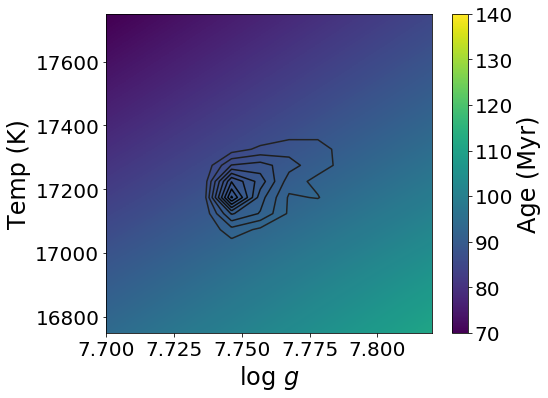

In [62]:
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(g2, t2, color='black', linewidths=1.5, gridsize=30, n_levels=10)
plt.imshow(DEM, cmap ='viridis',origin='lower',extent=[7.7,7.82,16750,17750], aspect='auto', vmin=70, vmax=140)
cbar = plt.colorbar()
cbar.set_label('Age (Myr)')
plt.xlabel(r'log $g$')
plt.ylabel('Temp (K)')
plt.tight_layout()
plt.savefig('WOCS4540_setdist_plummer.pdf', dpi=300) ;

#ax.axis([7.7,8.0,16500,18000])

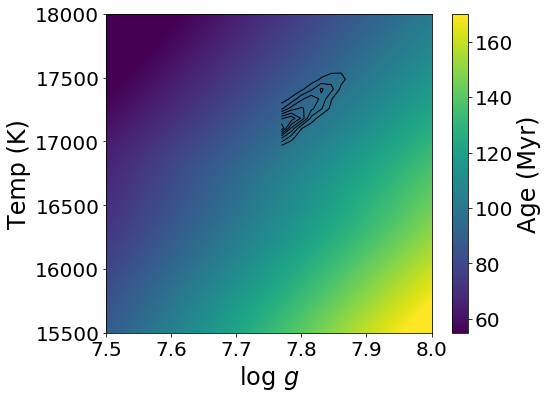

In [18]:
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title
fig, ax = plt.subplots(figsize=(8,6))
plt.imshow(DEM, cmap ='viridis',origin='lower',extent=[7.5,8.0,15500,18000], aspect='auto', vmin=55, vmax=170)
cbar = plt.colorbar()
cbar.set_label('Age (Myr)')
ax.set_xlabel(r'log $g$')
ax.set_ylabel('Temp (K)')
ax.axis([7.5,8.0,15500,18000])
#ax.set_aspect(2)
#xArrayNormalized=xArray/(np.max(xArray)-np.min(xArray))
#xArrayNormalized-=np.min(xArrayNormalized)
#yArrayNormalized=yArray/(np.max(yArray)-np.min(yArray))
#yArrayNormalized-=np.min(yArrayNormalized)
#plt.scatter(numIndexes*xArrayNormalized,numIndexes*yArrayNormalized,color='k',alpha=0.25)
#plt.scatter(xArray,yArray,color='k',alpha=0.2)


from matplotlib.colors import LogNorm
counts, xbins, ybins = np.histogram2d(g2, t2, bins=17, normed=LogNorm())

plt.contour(xbins[:-1],ybins[:-1],counts.transpose(),
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    linewidths=1,colors='black',linestyles='solid');

plt.tight_layout()


plt.savefig('WOCS4540_age_setdist.pdf',dpi=900)

## Finding age of other WDs for Emily

In [30]:
#emilyg = np.array([7.675, 7.62, 7.605, 7.658])
emilyg = np.array([8.41, 8.14, 8.0, 7.8])
diffg = np.array([8.31, 8.24, 8.1, 7.9])
emilyt = np.array([28700, 10000, 35000, 37200])
emilyterr = np.array([1500, 750, 5000, 300])

In [25]:
emilyage = np.zeros(len(emilyg))
emilymass = np.zeros(len(emilyg))
for i in range(0, len(emilyg)):
    emilyage[i] = interpage([emilyg[i],emilyt[i]])
    emilymass[i] = interpMo([emilyg[i],emilyt[i]])
print(emilyage / 10**6.)
print(emilymass)

[ 51.3606308 836.176       6.331       4.760176 ]
[0.888566 0.68932  0.661    0.581968]


In [ ]:
[ 11.887152    5.00556     4.2208996   8.6497392]

In [27]:
emilyage = np.zeros(len(emilyg))
emilymass = np.zeros(len(emilyg))
for i in range(0, len(emilyg)):
    emilyage[i] = interpage([emilyg[i],(emilyt[i] + emilyterr[i])])
    emilymass[i] = interpMo([emilyg[i],(emilyt[i] + emilyterr[i])])
print(emilyage / 10**6.)
print(emilymass)

[ 39.4139064 673.952       4.018       4.6411   ]
[0.890796 0.69154  0.672    0.5827  ]


In [28]:
emilyage = np.zeros(len(emilyg))
emilymass = np.zeros(len(emilyg))
for i in range(0, len(emilyg)):
    emilyage[i] = interpage([emilyg[i],(emilyt[i] - emilyterr[i])])
    emilymass[i] = interpMo([emilyg[i],(emilyt[i] - emilyterr[i])])
print(emilyage / 10**6.)
print(emilymass)

[  64.2821048 1054.628        9.239        4.879252 ]
[0.886496 0.6881   0.646    0.581236]


In [29]:
r = np.sqrt(6.67e-8 * emilymass * 1.99e33 / 10**emilyg)
r / 6.96e10

array([0.00972117, 0.01168708, 0.01330444, 0.01588753])

In [31]:
emilyage = np.zeros(len(emilyg))
emilymass = np.zeros(len(diffg))
for i in range(0, len(diffg)):
    emilyage[i] = interpage([diffg[i],emilyt[i]])
    emilymass[i] = interpMo([diffg[i],emilyt[i]])
print(emilyage / 10**6.)
print(emilymass)

[  41.9064428 1002.516       10.0208       5.036728 ]
[0.828706 0.75312  0.7196   0.623904]


In [40]:
oldg = np.array([8.0, 8.0, 8.0, 8.0, 8.0])
oldt = np.array([13000, 13200, 11200, 11300, 11800])
oldterr = np.array([500, 500, 500, 500, 500])

In [41]:
oldage = np.zeros(len(oldg))
oldmass = np.zeros(len(oldg))
for i in range(0, len(oldg)):
    oldage[i] = interpage([oldg[i],oldt[i]])
    oldmass[i] = interpMo([oldg[i],oldt[i]])
print(oldage / 10**6.)
print(oldmass)

[300.5  288.34 448.86 438.54 391.26]
[0.608  0.6084 0.6034 0.6036 0.6052]


In [38]:
oldage = np.zeros(len(oldg))
oldmass = np.zeros(len(oldg))
for i in range(0, len(oldg)):
    oldage[i] = interpage([oldg[i],(oldt[i] + oldterr[i])])
    oldmass[i] = interpMo([oldg[i],(oldt[i] + oldterr[i])])
print(oldage / 10**6.)
print(oldmass)

[219.58  210.444 330.836 323.204 288.008]
[0.5134  0.51396 0.50824 0.50856 0.51004]


In [39]:
oldage = np.zeros(len(oldg))
oldmass = np.zeros(len(oldg))
for i in range(0, len(oldg)):
    oldage[i] = interpage([oldg[i],(oldt[i] - oldterr[i])])
    oldmass[i] = interpMo([oldg[i],(oldt[i] - oldterr[i])])
print(oldage / 10**6.)
print(oldmass)

[274.72 263.   421.5  411.1  363.78]
[0.5106  0.51116 0.50536 0.50564 0.50704]


In [11]:
interpage([7.75, 15900]) / 10**6.

array([122.328])

## Finding age of WDs for spindown paper

In [12]:
modg_He = 7.45 + 0.06
T_He = 15400. - 280
modT_He = np.log10(T_He)
modage_He = griddata((t_He, logg_He), age_He, (modT_He, modg_He), method='linear', fill_value=1e20)
modage_He

array(271.04629196)

In [21]:
newg = 7.75
newgerr_p = 0.04
newgerr_m = 0.02

newt = 17100.
newterr_p = 145.
newterr_m = 100.

newage = interpage([(newg - newgerr_m),(newt - newterr_m)])
newage / 10**6.

array([94.0444])